# 전처리(Preprocessing)

#### (1) 표준화(Standardization)
- 데이터가 평균으로부터 얼마나 떨어져 있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는
  outlier(이상치)로 간주하여 제거한다.
- StandardScaler 사용 (Scaling)    * import numpy
  - Z = (X - mean())/std()  
  - 특정 데이터(이상치)에서 평균을 뺀 후 표준편차로 나눠준다.

#### (2) 정규화(Normalization)
- 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 기능
- 데이터 범위를 0 ~ 1로 변환
- MinMaxScaler 사용
  - Z = (X - min())/(max() - min())
  
### 데이터 분석 절차
데이터 표준화를 통해 outlier를 제거하고, 그 다음 데이터 정규화를 하여
상대적 크기의 영향력을 줄인 다음 분석을 시작한다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# 표준화(Standardization) : StandardScaler
# (1) Numpy를 이용한 표준화
# Z = (X - mean())/std()

data = np.random.randint(10000, size = (3, 4)) # 정수를 무작위로 만드는 함수 " np. random.randint(범위, size = (행, 열)) "
print('Raw data: \n', data)
data_std_np = (data - np.mean(data, axis = 0))/np.std(data, axis = 0) # 행(axis = 1)과 열(axis = 0)을 구분해 주어야 한다.
print('Numpy Standardized data: \n', data_std_np)


Raw data: 
 [[3779  477 8987 4721]
 [1946 5789 1668 4646]
 [7276 6631 9032  546]]
Numpy Standardized data: 
 [[-0.25086372 -1.40291103  0.70059555  0.72624377]
 [-1.0798899   0.54692241 -1.41419364  0.68779557]
 [ 1.33075362  0.85598862  0.71359808 -1.41403934]]


In [12]:
# (2) scipy.stats 를 이용한 표준화 : zscore()
import scipy.stats as ss
data_std_ss = ss.zscore(data)
print('scipy Standardized data: \n', data_std_ss)

scipy Standardized data: 
 [[-0.25086372 -1.40291103  0.70059555  0.72624377]
 [-1.0798899   0.54692241 -1.41419364  0.68779557]
 [ 1.33075362  0.85598862  0.71359808 -1.41403934]]


In [13]:
# (3) sklearn.preprocessing 을 이용한 표준화
# StandardScaler().fit_transform()
from sklearn.preprocessing import StandardScaler
data_std_skl = StandardScaler().fit_transform(data)
print('sklearn Standardized data: \n', data_std_skl)

sklearn Standardized data: 
 [[-0.25086372 -1.40291103  0.70059555  0.72624377]
 [-1.0798899   0.54692241 -1.41419364  0.68779557]
 [ 1.33075362  0.85598862  0.71359808 -1.41403934]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# 정규화 : MinMaxScaler
# (1) Numpy를 이용한 정규화
# Z = (X - min())/max() - min()
data_minmax_np = (data - np.min(data, axis = 0))/(np.max(data, axis = 0) - np.min(data, axis = 0))
print('Raw data: \n', data)
print('numpy minmax data: \n', data_minmax_np)
# 열을 기준으로 했을 경우 행과 있는 숫자들을 비교해서는 안된다. 반대의 경우도 마찬가지이다.
# 그 열의 최소값은 0으로 나타나고 최대값은 1로 나타난다.
# 나머지는 비율로 계산된다.

Raw data: 
 [[3779  477 8987 4721]
 [1946 5789 1668 4646]
 [7276 6631 9032  546]]
numpy minmax data: 
 [[0.34390244 0.         0.99388919 1.        ]
 [0.         0.86317842 0.         0.98203593]
 [1.         1.         1.         0.        ]]


In [19]:
# (2) sklearn.preprocessing 을 이용한 정규화
# MinMaxScaler().fit_transform()
from sklearn.preprocessing import MinMaxScaler
data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn minmax data:\n', data_minmax_skl)

sklearn minmax data:
 [[0.34390244 0.         0.99388919 1.        ]
 [0.         0.86317842 0.         0.98203593]
 [1.         1.         1.         0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Raw data:
 [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155 -0.35087189
 -0.93943336 -0.48933722 -0.80459114 -0.21269764 -0.33914025  0.31216994
  0.56515267 -0.14742026 -0.02590534  0.2890942  -0.53987907  0.70816002
  0.84222474  0.2035808   2.39470366  0.91745894 -0.11227247 -0.36218045
 -0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603 -0.36249918 -0.12190569  0.31935642  0.4609029
 -0.21578989  0.98907246  0.31475378  2.46765106 -1.50832149  0.62060066
 -1.04513254 -0.79800882  1.98508459  1.7

<function matplotlib.pyplot.show(*args, **kw)>

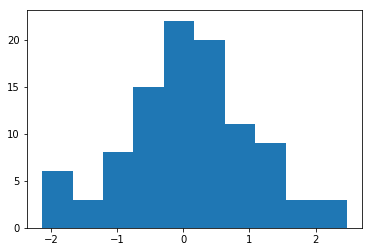

In [21]:
# 이상치(Outlier)를 제거하여 표준화하기

np.random.seed(10)
data = np.random.randn(100)  # 정규분포로 랜덤하게 100개 생성
print('Raw data:\n', data)
plt.hist(data)
plt.show    # 정규성이 있는 데이터다

Outlier inserted data:
 [ 1.33158650e+00  7.15278974e-01 -1.54540029e+00 -8.38384993e-03
  6.21335974e-01 -7.20085561e-01  2.65511586e-01  1.08548526e-01
  4.29143093e-03 -1.74600211e-01  4.33026190e-01  1.20303737e+00
 -9.65065671e-01  1.02827408e+00  2.28630130e-01  4.45137613e-01
 -1.13660221e+00  1.35136878e-01  1.48453700e+00 -1.07980489e+00
 -1.97772828e+00 -1.74337230e+00  2.66070164e-01  2.38496733e+00
  1.12369125e+00  1.67262221e+00  9.91492158e-02  1.39799638e+00
 -2.71247988e-01  6.13204185e-01 -2.67317189e-01 -5.49309014e-01
  1.32708296e-01 -4.76142015e-01  1.30847308e+00  1.95013279e-01
  4.00209988e-01 -3.37632337e-01  1.25647226e+00 -7.31969502e-01
  6.60231551e-01 -3.50871891e-01 -9.39433360e-01 -4.89337217e-01
 -8.04591142e-01 -2.12697639e-01 -3.39140246e-01  3.12169936e-01
  5.65152670e-01 -1.47420258e-01 -2.59053368e-02  2.89094204e-01
 -5.39879071e-01  7.08160020e-01  8.42224738e-01  2.03580797e-01
  2.39470366e+00  9.17458938e-01 -1.12272471e-01 -3.62180447e-01
 

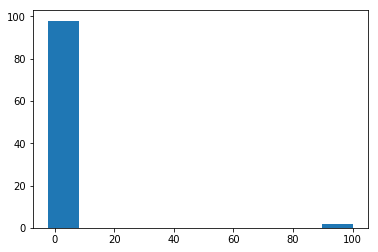

In [26]:
data[98:100] = 100 # 2개의 이상치 입력
print('Outlier inserted data:\n', data)
plt.hist(data)
plt.show()    # 정규성이 없는 그래프(data)다.

Numpy Standardized data: 
 [-0.05414927 -0.09811235 -0.25937343 -0.14973341 -0.10481359 -0.20050124
 -0.13019562 -0.14139227 -0.14882924 -0.16159012 -0.11824629 -0.06331907
 -0.21797641 -0.07578546 -0.13282648 -0.11738235 -0.23021263 -0.13949564
 -0.04323885 -0.2261611  -0.29021269 -0.27349537 -0.13015577  0.02099156
 -0.06897907 -0.02982217 -0.14206275 -0.04941206 -0.1684843  -0.10539365
 -0.1682039  -0.18831923 -0.13966888 -0.18310001 -0.05579802 -0.13522447
 -0.12058717 -0.17321969 -0.0595074  -0.20134896 -0.10203905 -0.17416411
 -0.21614798 -0.18404126 -0.20652928 -0.16430773 -0.17332726 -0.12686734
 -0.10882131 -0.15965129 -0.15098327 -0.1285134  -0.18764656 -0.09862017
 -0.08905693 -0.13461333  0.02168608 -0.08369024 -0.15714409 -0.17497079
 -0.16569762 -0.1849252  -0.06861571 -0.19891226 -0.15492205 -0.18689165
 -0.07450798 -0.25032525 -0.17499352 -0.15783126 -0.1263547  -0.11625776
 -0.1645283  -0.07858183 -0.12668302  0.02688964 -0.25672849 -0.10486604
 -0.22368782 -0.20605974

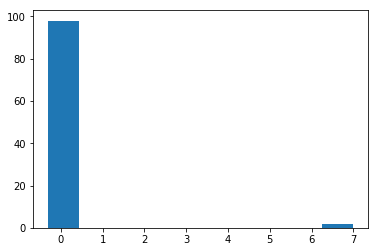

In [31]:
data_std_np = (data - np.mean(data, axis = 0))/np.std(data, axis= 0)
data_std_np
print('Numpy Standardized data: \n', data_std_np)
# [..., 100  100] -> [..., 6.98416665  6.98416665]
plt.hist(data_std_np)
plt.show()

zoomin data:
 [-0.05414927 -0.09811235 -0.25937343 -0.14973341 -0.10481359 -0.20050124
 -0.13019562 -0.14139227 -0.14882924 -0.16159012 -0.11824629 -0.06331907
 -0.21797641 -0.07578546 -0.13282648 -0.11738235 -0.23021263 -0.13949564
 -0.04323885 -0.2261611  -0.29021269 -0.27349537 -0.13015577  0.02099156
 -0.06897907 -0.02982217 -0.14206275 -0.04941206 -0.1684843  -0.10539365
 -0.1682039  -0.18831923 -0.13966888 -0.18310001 -0.05579802 -0.13522447
 -0.12058717 -0.17321969 -0.0595074  -0.20134896 -0.10203905 -0.17416411
 -0.21614798 -0.18404126 -0.20652928 -0.16430773 -0.17332726 -0.12686734
 -0.10882131 -0.15965129 -0.15098327 -0.1285134  -0.18764656 -0.09862017
 -0.08905693 -0.13461333  0.02168608 -0.08369024 -0.15714409 -0.17497079
 -0.16569762 -0.1849252  -0.06861571 -0.19891226 -0.15492205 -0.18689165
 -0.07450798 -0.25032525 -0.17499352 -0.15783126 -0.1263547  -0.11625776
 -0.1645283  -0.07858183 -0.12668302  0.02688964 -0.25672849 -0.10486604
 -0.22368782 -0.20605974 -0.00753328 

(array([ 5.,  3.,  8., 15., 22., 20., 10.,  9.,  3.,  3.]),
 array([-0.30119682, -0.26838818, -0.23557953, -0.20277088, -0.16996224,
        -0.13715359, -0.10434494, -0.0715363 , -0.03872765, -0.005919  ,
         0.02688964]),
 <a list of 10 Patch objects>)

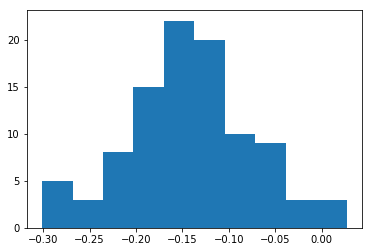

In [33]:
# zoom-in
data_std_np_zoomin = data_std_np[data_std_np<5]
print('zoomin data:\n', data_std_np_zoomin)
plt.hist(data_std_np_zoomin)


[[-0.05414927]
 [-0.09811235]
 [-0.25937343]
 [-0.14973341]
 [-0.10481359]
 [-0.20050124]
 [-0.13019562]
 [-0.14139227]
 [-0.14882924]
 [-0.16159012]
 [-0.11824629]
 [-0.06331907]
 [-0.21797641]
 [-0.07578546]
 [-0.13282648]
 [-0.11738235]
 [-0.23021263]
 [-0.13949564]
 [-0.04323885]
 [-0.2261611 ]
 [-0.29021269]
 [-0.27349537]
 [-0.13015577]
 [ 0.02099156]
 [-0.06897907]
 [-0.02982217]
 [-0.14206275]
 [-0.04941206]
 [-0.1684843 ]
 [-0.10539365]
 [-0.1682039 ]
 [-0.18831923]
 [-0.13966888]
 [-0.18310001]
 [-0.05579802]
 [-0.13522447]
 [-0.12058717]
 [-0.17321969]
 [-0.0595074 ]
 [-0.20134896]
 [-0.10203905]
 [-0.17416411]
 [-0.21614798]
 [-0.18404126]
 [-0.20652928]
 [-0.16430773]
 [-0.17332726]
 [-0.12686734]
 [-0.10882131]
 [-0.15965129]
 [-0.15098327]
 [-0.1285134 ]
 [-0.18764656]
 [-0.09862017]
 [-0.08905693]
 [-0.13461333]
 [ 0.02168608]
 [-0.08369024]
 [-0.15714409]
 [-0.17497079]
 [-0.16569762]
 [-0.1849252 ]
 [-0.06861571]
 [-0.19891226]
 [-0.15492205]
 [-0.18689165]
 [-0.07450

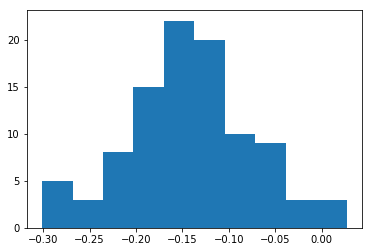

In [48]:
# Scikit-learn 사용
# 원시 데이터의 차원을 바꿔야 한다. scikit learn은 2차원 이상만 사용 가능
data.shape # (100, )
data = data.reshape(-1, 1) # 1차원 배열을 2차원으로 바꿈
data.shape # (100, 1)
data_std_ski = StandardScaler().fit_transform(data)
print(data_std_ski)
data_stand_ski_zoomin = data_std_ski[data_std_ski < 5]
print('zoomin: \n', data_stand_ski_zoomin)
plt.hist(data_stand_ski_zoomin)
plt.show()